START NOTEBOOK

## Set-up 

In [1]:
from hydroplots import *
from leach_hydrology import *
import numpy as np

import mpld3
mpld3.enable_notebook()


from mpld3 import plugins

# Plot graphs within this document
%matplotlib inline

# Plot graphs outside (for interaction)
# %matplotlib

from pestmob import *
from mixinglayer import *

### Microcosm

In [2]:
d = (14.93 * 2)  # Diameter of falcon tube (mm)
area = ((d / 2) ** 2) * 3.1416  # (mm2)
zl = soil_height1 = 20  # Mixing layer depth in mm

### Soil - Hydrological Characteristics

In [3]:
''' Hydrological controlling parameters'''
# Alteck (Martine Trautmann, sampled pre-event)
porosity_crop = 0.61  # Crop soil
kSat_crop = 2.24  # mm/min (13.45 cm/h - Crop Soil) 
kSat_crop2 = kSat_crop/100 
# ov_1 = 0.20   # Initial water content m3. m-3
ovSat_crop = 0.61  # Saturated water content (assumed)
psi_crop = 1100  # soil suction Alteck (mm)
psi_crop2 = 617.0  # soil suction Alteck (mm)
#  (Lefrancq, 2014: 61.7 cm , p.160; 110 cm, p.189)

# Results

## Hydrology - 1st pulse

##### Observed percolation

In [4]:
# all at 6 min, high inetnesity
leach_high_6min = np.array([16.253, 12.958, 17.536, 14.29])  

# all at 12 min, med intensity
leach_med_12min = np.array([10.089, 5.902, 13.981, 10.602]) 

# all at 30min, med intensity
leach_med_30min = np.array([49.197, 40.402, 45.772, 47.201])  

# all at 30min, low intensity
leach_low_30min = np.array([20.037, 17.508, 22.376, 20.085])  

#### Computation

In [5]:
water_data = leachsim(kSat = kSat_crop,
                      soil_height=soil_height1,
                      soil = 'Alteck',
                      psi=psi_crop)

Mass balance 0.0
Mass balance 0.0
Mass balance 0.0


In [6]:
# Time
cum_time_30min = water_data[:, 0]

# Cummulative infiltration
cum_inf_135mmh = water_data[:, 4]
cum_inf_55mmh = water_data[:, 5] 
cum_inf_30mmh = water_data[:, 6] 

# Cummulative leaching
cum_leach_135mmh = water_data[:, 7]
cum_leach_55mmh = water_data[:, 8]
cum_leach_30mmh = water_data[:, 9]

# Ponding
roff_135mmh = water_data[:, 10]
roff_55mmh = water_data[:, 11]
roff_30mmh = water_data[:, 12]

# Cummulative ponding
cum_roff_135mmh = water_data[:, 13]
cum_roff_55mmh = water_data[:, 14]
cum_roff_30mmh = water_data[:, 15]

infil_135mmh = water_data[:, 16]
infil_55mmh = water_data[:, 17]
infil_30mmh = water_data[:, 18]

percol_data1 = stackdata3(cum_time_30min,
                          cum_leach_135mmh, cum_leach_55mmh, cum_leach_30mmh)

runoff_data1 = stackdata3(cum_time_30min,
                          cum_roff_135mmh, cum_roff_55mmh, cum_roff_30mmh)

infil_data1 = stackdata3(cum_time_30min,
                         infil_135mmh, infil_55mmh, infil_30mmh)

time_size_135mmh = water_data[:, 19]
time_size_55mmhA = water_data[:, 20]
time_size_55mmhB = water_data[:, 20]
time_size_30mmh = water_data[:, 21]

time_sizes1 = [time_size_135mmh, time_size_135mmh,
               time_size_55mmhA, time_size_55mmhA,
               time_size_55mmhB, time_size_55mmhB,
               time_size_30mmh, time_size_30mmh]


In [7]:
#hydroplot(percol_data1, 
#          "Percolated at 135mm/h", "Percolated at 55mm/h", "Percolated at 30mm/h",
#          leach_high_6min, 
#          leach_med_12min, leach_med_30min, 
#          leach_low_30min,
#          "Leached Volume [mL] - Crop Soil 1st Pulse")

## Transport - 1st pulse

** Initial and observed mass in leachate and ponding **

In [8]:
#  Dictionary contains:
#  Scenario: (initial_mass, leached_mass_observed, ponded_mass_obs)
znCr_dict_S_1st = {
    'a_high_0d': (3106.12, 16.8, 'nan'),
    'b_high_1d': (2594.16, 16.7, 'nan'),
    'c_med12_0d': (3106.12, 17.7, 'nan'),
    'd_med12_1d': (2594.16, 16.3, 'nan'),
    'e_med30_0d': (3106.12, 523.4, 'nan'),
    'f_med30_1d': (2594.16, 285.1, 'nan'),
    'g_low_0d': (3106.12, 37.1, 'nan'),
    'h_low_1d': (2594.16, 23.2, 'nan')
}

znCr_dict_L_1st = {
    'a_high_0d': (2636.02, 0.9, 'nan'),
    'b_high_1d': (2586.08, 3.5, 'nan'),
    'c_med12_0d': (2636.02, 0.8, 'nan'),
    'd_med12_1d': (2586.0, 3.2, 'nan'),
    'e_med30_0d': (2636.02, 17.2, 'nan'),
    'f_med30_1d': (2586.0, 56.5, 'nan'),
    'g_low_0d': (2636.02, 1.7, 'nan'),
    'h_low_1d': (2586.0, 4.5, 'nan')
}

### Soil - Transport Charachteristics

In [9]:
# Soil characteristics
pb_crop = 0.99/10**3  # bulk density (g/cm^3) -> g/mm^3
porosity_crop = 0.61  # Crop soil

# Assumed (used to calculate Reynolds number)
runoff_vel = 20.0  # mm/min

# Fraction organic matter and carbon (Scenario 1)
fom_crop_sterile = 3.87/100.0
fom_crop_untreat = 5.51/100.0
foc_crop_sterile = 0.58*fom_crop_sterile
foc_crop_untreat = 0.58*fom_crop_untreat

# Soil characteristics (OC Black & Walkley - Scenario 2)
# foc_crop_untreat2 = 2.04/100
# foc_crop_sterile2 = 0.70*foc_crop_untreat2

### Zinc Properties

In [10]:
# Kd (Zinc) Allison and Allison, 2005 - EPA/600/R-05/074:  
# log(Kd) range: 1.5 - 6.9
Kd_zinc1 = 10**0.5  # [mL/g] = [L/Kg] 
Kd_zinc2 = 10**0.8
Kd_zinc3 = 10**1.0
Kd_zinc4 = 10**1.5

Kd_zinc = [Kd_zinc1, Kd_zinc2, Kd_zinc3, Kd_zinc4]
Kd_zinc = np.array(Kd_zinc)*10**3  # mm3/g

In [11]:
# kdmx_array = np.asarray(Kd_smeto_sterile)
# np.log10(kdmx_array)

### Computation transport - 1st pulse

In [12]:
# Any length unit input must be: "mm"
pest_sterile_1st = pest_test3(
    Kd_zinc,
    znCr_dict_S_1st,          
    pb_crop,
    ovSat_crop,
    percol_data1, percol_data1,
    runoff_data1, runoff_data1, 
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    KFILM = True,
    first_cycle = True)

Best log Kd:  3.8 ( Num:  2 ) 
 Error:  0.174761757623 , R2:  0.747366737438
SSres:  62830.427666
SStot:  248702.11874999997
mean mass:  117.03750000000001 sum_mass: 936.3000000000001


In [13]:
# Any length unit input must be: "mm"
pest_living_1st = pest_test3(
    Kd_zinc,
    znCr_dict_L_1st,          
    pb_crop,
    ovSat_crop,
    percol_data1, percol_data1,
    runoff_data1, runoff_data1, 
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    KFILM = True,
    first_cycle = True)

Best log Kd:  4.5 ( Num:  4 ) 
 Error:  0.28025294008 , R2:  0.238682194121
SSres:  1949.39896938
SStot:  2560.5587499999997
mean mass:  11.0375 sum_mass: 88.3


#### Sterile time series

In [14]:
# Cumulative leachate sterilized
high_0d_cum_mass_out_dt = pest_sterile_1st[:, 1]
high_1d_cum_mass_out_dt = pest_sterile_1st[:, 2]

med12_0d_cum_mass_out_dt = pest_sterile_1st[:, 3]
med12_1d_cum_mass_out_dt = pest_sterile_1st[:, 4]

med30_0d_cum_mass_out_dt = pest_sterile_1st[:, 5]
med30_1d_cum_mass_out_dt = pest_sterile_1st[:, 6]

low_0d_cum_mass_out_dt = pest_sterile_1st[:, 7]
low_1d_cum_mass_out_dt = pest_sterile_1st[:, 8]

# Ponded mass
high_0d_overmass_dt = pest_sterile_1st[:, 9]
high_1d_overmass_dt = pest_sterile_1st[:, 10]
med12_0d_overmass_dt = pest_sterile_1st[:, 11]
med12_1d_overmass_dt = pest_sterile_1st[:, 12]

med30_0d_overmass_dt = pest_sterile_1st[:, 13]
med30_1d_overmass_dt = pest_sterile_1st[:, 14]
low_0d_overmass_dt = pest_sterile_1st[:, 15]
low_1d_overmass_dt = pest_sterile_1st[:, 16]


mass_percol_sterile1 = stackdata8(cum_time_30min,
                          high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt, 
                          med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt, 
                          med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
                          low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_sterile1 = stackdata8(cum_time_30min,
                          high_0d_overmass_dt, high_1d_overmass_dt,
                          med12_0d_overmass_dt, med12_1d_overmass_dt,
                          med30_0d_overmass_dt, med30_1d_overmass_dt,
                          low_0d_overmass_dt, low_1d_overmass_dt)

#### Living time series

In [15]:
# Cumulative leachate
high_0d_cum_mass_out_dt = pest_living_1st[:, 1]
high_1d_cum_mass_out_dt = pest_living_1st[:, 2]

med12_0d_cum_mass_out_dt = pest_living_1st[:, 3]
med12_1d_cum_mass_out_dt = pest_living_1st[:, 4]

med30_0d_cum_mass_out_dt = pest_living_1st[:, 5]
med30_1d_cum_mass_out_dt = pest_living_1st[:, 6]

low_0d_cum_mass_out_dt = pest_living_1st[:, 7]
low_1d_cum_mass_out_dt = pest_living_1st[:, 8]

# Ponded mass
high_0d_overmass_dt = pest_living_1st[:, 9]
high_1d_overmass_dt = pest_living_1st[:, 10]
med12_0d_overmass_dt = pest_living_1st[:, 11]
med12_1d_overmass_dt = pest_living_1st[:, 12]

med30_0d_overmass_dt = pest_living_1st[:, 13]
med30_1d_overmass_dt = pest_living_1st[:, 14]
low_0d_overmass_dt = pest_living_1st[:, 15]
low_1d_overmass_dt = pest_living_1st[:, 16]


mass_percol_living1 = stackdata8(cum_time_30min,
                          high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt, 
                          med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt, 
                          med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
                          low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_living1 = stackdata8(cum_time_30min,
                          high_0d_overmass_dt, high_1d_overmass_dt,
                          med12_0d_overmass_dt, med12_1d_overmass_dt,
                          med30_0d_overmass_dt, med30_1d_overmass_dt,
                          low_0d_overmass_dt, low_1d_overmass_dt)

## Plotting transport - Zinc

### Sterile (1st Pulse, Crop Soil)

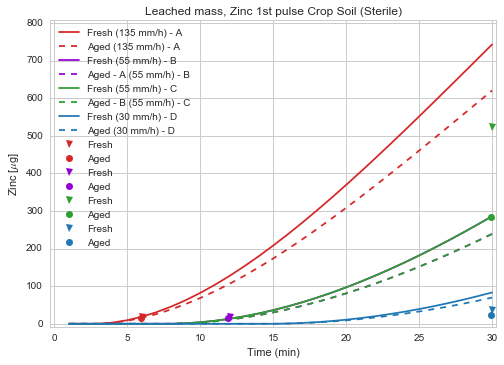

In [16]:
pestiplot_condition(
    mass_percol_sterile1,
    znCr_dict_S_1st,
    'Zinc',
    soil_type='Crop Soil',
    cycle = '1st pulse',
    LEACH = True,
    STERILE = True
)

### Living (1st Pulse, Crop Soil)

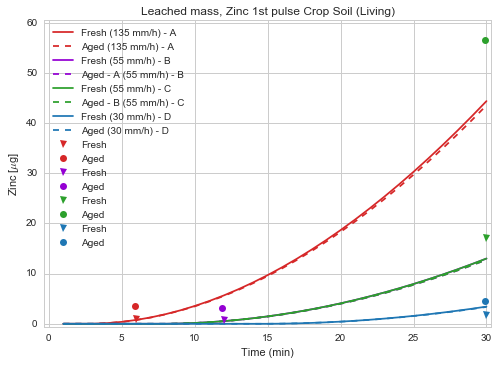

In [17]:
pestiplot_condition(
    mass_percol_living1,
    znCr_dict_L_1st,
    'Zinc',
    soil_type='Crop Soil',
    cycle = '1st pulse',
    LEACH = True,
    STERILE = False
)

# Hydrology - 2nd pulse

In [18]:
''' Hydrological controlling parameters'''
ov_2 = ovSat_crop - 0.038  # Initial water content m3. m-3
psi_crop = 1100  # soil suction Alteck mm
psi_cropB = 617  # soil suction Alteck mm
#  (Lefrancq, 2014: 61.7 cm , p.160; 110 cm, p.189)
soil_height2 = 20  # mm

**Observed Percolation - 2nd pulse**

In [19]:
# Order if array is:
#  [sterile, untreat, sterile_aged, untreat_aged]

# At 6 min, high inetnesity
leach_high_6min = np.array([14.192, 8.245, 2.410, 5.469]) 

# At 12 min, med intensity
leach_med_12min = np.array([18.672, 19.0, 0.830, 11.407]) 

# At 30min, med intensity
leach_med_30min = np.array([12.697, 2.473, 3.52, 20.291])  

# At 30min, low intensity
leach_low_30min = np.array([29.656, 9.375, 0.409, 3.385]) 

**Observed Ponding - 2nd pulse**

In [20]:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity
roff_high_6min = np.array([10.824, 20.935, 24.75, 19.041])  

# all at 12 min, med intensity
roff_med_12min = np.array([0, 3.907, 19.436, 7.313]) 

# all at 30min, med intensity
roff_med_30min = np.array([43.764, 28.911, 51.964, 33.478])  

# all at 30min, low intensity
roff_low_30min = np.array([0, 22.618, 28.598, 27.314])  

### Inverse Ksat determination 

Based on hisotric rainfall pattern, fresh and aged.

In [21]:
water2_ktest_fresh = leachsim2(
    leach_high_6min, 
    leach_med_12min, leach_med_30min, 
    leach_low_30min,
    kSat = [kSat_crop/25, kSat_crop/50, kSat_crop/100, 
            kSat_crop/125, kSat_crop/150, kSat_crop/175, 
            kSat_crop/200, kSat_crop/250],
    soil_height=soil_height2,
    soil = 'Alteck',
    dtGA = 1,
    AGED = False
)

0.0 5.820766091346741e-11 3.637978807091713e-11 -3.637978807091713e-12
ksat high:  0.044800000000000006
ksat med12:  0.08960000000000001
ksat med30:  0.008960000000000001
ksat low:  0.044800000000000006


In [22]:
water2_ktest_aged = leachsim2(
    leach_high_6min, 
    leach_med_12min, leach_med_30min, 
    leach_low_30min,
    kSat = [kSat_crop/50, kSat_crop/100, kSat_crop/125, 
            kSat_crop/150, kSat_crop/175, kSat_crop/200, 
            kSat_crop/250, kSat_crop/700, kSat_crop/1000],
    soil_height=soil_height2,
    soil = 'Alteck',
    dtGA = 1,
    AGED = True
)

2.9103830456733704e-11 3.637978807091713e-11 3.637978807091713e-11 -7.275957614183426e-12
ksat high:  0.008960000000000001
ksat med12:  0.011200000000000002
ksat med30:  0.011200000000000002
ksat low:  0.0022400000000000002


#### Time series fresh

In [23]:
# Time axis
cum_time_30min = water2_ktest_fresh[:, 0]

# Cumulative leachate
cum_leach_135mmh = water2_ktest_fresh[:, 9]
cum_leach_55mmhA = water2_ktest_fresh[:, 10]
cum_leach_55mmhB = water2_ktest_fresh[:, 11]
cum_leach_30mmh = water2_ktest_fresh[:, 12]

# Group each compartment for graphing
percol_data2_fresh = stackdata4(
    cum_time_30min,
    cum_leach_135mmh, 
    cum_leach_55mmhA, cum_leach_55mmhB, 
    cum_leach_30mmh)

# Ponding fresh
roff_135mmh = water2_ktest_fresh[:, 13]
roff_55mmhA = water2_ktest_fresh[:, 14]
roff_55mmhB = water2_ktest_fresh[:, 15]
roff_30mmh = water2_ktest_fresh[:, 16]

# Cummulative ponding
cum_roff_135mmh = water2_ktest_fresh[:, 17]
cum_roff_55mmhA = water2_ktest_fresh[:, 18]
cum_roff_55mmhB = water2_ktest_fresh[:, 19]
cum_roff_30mmh = water2_ktest_fresh[:, 20]


runoff_data2_fresh = stackdata4(
    cum_time_30min,
    cum_roff_135mmh, 
    cum_roff_55mmhA, cum_roff_55mmhB, 
    cum_roff_30mmh)


time_size_135mmh = water2_ktest_fresh[:, 25]
time_size_55mmhA = water2_ktest_fresh[:, 26]
time_size_55mmhB = water2_ktest_fresh[:, 27]
time_size_30mmh = water2_ktest_fresh[:, 28]

time_sizes2 = [time_size_135mmh, 
               time_size_55mmhA, time_size_55mmhB, 
               time_size_30mmh]

#### Time series aged

In [24]:
# Time axis
cum_time_30min = water2_ktest_aged[:, 0]

# Cumulative leachate
cum_leach_135mmh = water2_ktest_aged[:, 9]
cum_leach_55mmhA = water2_ktest_aged[:, 10]
cum_leach_55mmhB = water2_ktest_aged[:, 11]
cum_leach_30mmh = water2_ktest_aged[:, 12]

# Group each compartment for graphing
percol_data2_aged = stackdata4(
    cum_time_30min,
    cum_leach_135mmh, 
    cum_leach_55mmhA, cum_leach_55mmhB, 
    cum_leach_30mmh)

# Ponding Aged
roff_135mmh = water2_ktest_aged[:, 13]
roff_55mmhA = water2_ktest_aged[:, 14]
roff_55mmhB = water2_ktest_aged[:, 15]
roff_30mmh = water2_ktest_aged[:, 16]

# Cummulative ponding
cum_roff_135mmh = water2_ktest_aged[:, 17]
cum_roff_55mmhA = water2_ktest_aged[:, 18]
cum_roff_55mmhB = water2_ktest_aged[:, 19]
cum_roff_30mmh = water2_ktest_aged[:, 20]


runoff_data2_aged = stackdata4(
    cum_time_30min,
    cum_roff_135mmh, 
    cum_roff_55mmhA, cum_roff_55mmhB, 
    cum_roff_30mmh)


time_size_135mmh = water2_ktest_aged[:, 25]
time_size_55mmhA = water2_ktest_aged[:, 26]
time_size_55mmhB = water2_ktest_aged[:, 27]
time_size_30mmh = water2_ktest_aged[:, 28]

time_sizes2 = [time_size_135mmh, time_size_135mmh, 
               time_size_55mmhA, time_size_55mmhA, 
               time_size_55mmhB, time_size_55mmhB, 
               time_size_30mmh, time_size_30mmh]

### Percolation & ponding - 2nd pulse (fresh soil)

In [25]:
#hydroplot2(percol_data2_fresh, 
#          "Leached, 135mm/h", "Leached, 55mm/h - A", "Leached, 55mm/h - B", "Leached, 30mm/h",
#          leach_high_6min, 
#          leach_med_12min, leach_med_30min, 
#          leach_low_30min,
#         "Leached Volume [mL] - Crop Soil 2nd Pulse",
#          AGED = False)

In [26]:
#hydroplot2(runoff_data2_fresh, 
#          "Ponded, 135mm/h", "Ponded, 55mm/h - A", "Ponded, 55mm/h - B", "Ponded, 30mm/h",
#          roff_high_6min, roff_med_12min, roff_med_30min, roff_low_30min,
#         "Ponded Volume [mL] - Crop Soil 2nd Pulse",
#          AGED = False)

### Percolation & ponding - 2nd pulse (aged soil)

In [27]:
#hydroplot2(percol_data2_aged, 
#          "Leached, 135mm/h - A", 
#           "Leached, 55mm/h - B", "Leached, 55mm/h - C", 
#           "Leached, 30mm/h - D",
#          leach_high_6min, 
#           leach_med_12min, leach_med_30min, 
#           leach_low_30min,
#         "Leached Volume [mL] - Crop Soil 2nd Pulse",
#          AGED = True)

In [28]:
#hydroplot2(runoff_data2_aged, 
#          "Ponded, 135mm/h", "Ponded, 55mm/h - A", "Ponded, 55mm/h - B", "Ponded, 30mm/h",
#          roff_high_6min, roff_med_12min, roff_med_30min, roff_low_30min,
#         "Ponded Volume [mL] - Crop Soil 2nd Pulse",
#          AGED = True)

## Transport - 2nd pulse

** Initial and observed mass in leachate and ponding **

In [29]:
#  Dictionary contains:
#  Scenario: (initial_mass, leached_mass_observed, ponded_mass_obs)
znCr_dict_S_2nd = {
    'a_high_0d': (3089.3, 2.5, 'nan'),
    'b_high_1d': (2577.5, 0.4, 'nan'),
    'c_med12_0d': (3088.4, 3.6, 'nan'),
    'd_med12_1d': (2577.9, 'nan', 'nan'),
    'e_med30_0d': (2582.7, 1.3, 1.5),
    'f_med30_1d': (2309.1, 0.2, 2.2),
    'g_low_0d': (3069.0, 4.1, 'nan'),
    'h_low_1d': (2571.0, 'nan', 'nan')
}

znCr_dict_L_2nd = {
    'a_high_0d': (2635.2, 'nan', 'nan'),
    'b_high_1d': (2582.6, 0.32, 'nan'),
    'c_med12_0d': (2635.2, 'nan', 'nan'),
    'd_med12_1d': (2582.9, 0.99, 'nan'),
    'e_med30_0d': (2618.8, 'nan', 'nan'),
    'f_med30_1d': (2529.6, 0.45, 'nan'),
    'g_low_0d': (2634.3, 'nan', 'nan'),
    'h_low_1d': (2581.6, 0.05, 'nan')
}

#### Change in organic matter characterisitics

In [30]:
# ignored...

### Computation transport - 2nd Pulse

#### Kd optimal (sterile)

In [31]:

pest_sterile_2nd = pest_test3(
    Kd_zinc,
    znCr_dict_S_2nd,
    pb_crop,
    ovSat_crop,
    percol_data2_fresh, runoff_data2_fresh,
    percol_data2_aged, runoff_data2_aged, 
    time_sizes2,
    area, soil_height2,
    d, runoff_vel)


Best log Kd:  4.5 ( Num:  4 ) 
 Error:  1.51052924966 , R2:  -11.6966142576
SSres:  274.782947234
SStot:  21.642222222222223
mean mass:  2.0166666666666666 sum_mass: 12.1


#### Kd optimal (living)

In [32]:

pest_living_2nd = pest_test3(
    Kd_zinc,
    znCr_dict_L_2nd,
    pb_crop,
    ovSat_crop,
    percol_data2_fresh, runoff_data2_fresh,
    percol_data2_aged, runoff_data2_aged, 
    time_sizes2,
    area, soil_height2,
    d, runoff_vel)


Best log Kd:  4.5 ( Num:  4 ) 
 Error:  7.129642083 , R2:  -278.08334074
SSres:  359.319801202
SStot:  1.2874999999999999
mean mass:  0.4525 sum_mass: 1.81


#### Sterile time series

In [33]:
# Time axis
cum_time_30min = pest_sterile_2nd[:, 0]

# Cumulative leachate sterilized
high_0d_cum_mass_out_dt = pest_sterile_2nd[:, 1]
high_1d_cum_mass_out_dt = pest_sterile_2nd[:, 2]

med12_0d_cum_mass_out_dt = pest_sterile_2nd[:, 3]
med12_1d_cum_mass_out_dt = pest_sterile_2nd[:, 4]

med30_0d_cum_mass_out_dt = pest_sterile_2nd[:, 5]
med30_1d_cum_mass_out_dt = pest_sterile_2nd[:, 6]

low_0d_cum_mass_out_dt = pest_sterile_2nd[:, 7]
low_1d_cum_mass_out_dt = pest_sterile_2nd[:, 8]

# Ponded mass
high_0d_overmass_dt = pest_sterile_2nd[:, 9]
high_1d_overmass_dt = pest_sterile_2nd[:, 10]
med12_0d_overmass_dt = pest_sterile_2nd[:, 11]
med12_1d_overmass_dt = pest_sterile_2nd[:, 12]

med30_0d_overmass_dt = pest_sterile_2nd[:, 13]
med30_1d_overmass_dt = pest_sterile_2nd[:, 14]
low_0d_overmass_dt = pest_sterile_2nd[:, 15]
low_1d_overmass_dt = pest_sterile_2nd[:, 16]

mass_percol_sterile2 = stackdata8(
    cum_time_30min,
    high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt, 
    med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt, 
    med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
    low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_sterile2 = stackdata8(
    cum_time_30min,
    high_0d_overmass_dt, high_1d_overmass_dt,
    med12_0d_overmass_dt, med12_1d_overmass_dt,
    med30_0d_overmass_dt, med30_1d_overmass_dt,
    low_0d_overmass_dt, low_1d_overmass_dt)


#### Living time series

In [34]:
# Time axis
cum_time_30min = pest_living_2nd[:, 0]

# Cumulative leachate sterilized
high_0d_cum_mass_out_dt = pest_living_2nd[:, 1]
high_1d_cum_mass_out_dt = pest_living_2nd[:, 2]

med12_0d_cum_mass_out_dt = pest_living_2nd[:, 3]
med12_1d_cum_mass_out_dt = pest_living_2nd[:, 4]

med30_0d_cum_mass_out_dt = pest_living_2nd[:, 5]
med30_1d_cum_mass_out_dt = pest_living_2nd[:, 6]

low_0d_cum_mass_out_dt = pest_living_2nd[:, 7]
low_1d_cum_mass_out_dt = pest_living_2nd[:, 8]

# Ponded mass
high_0d_overmass_dt = pest_living_2nd[:, 9]
high_1d_overmass_dt = pest_living_2nd[:, 10]
med12_0d_overmass_dt = pest_living_2nd[:, 11]
med12_1d_overmass_dt = pest_living_2nd[:, 12]

med30_0d_overmass_dt = pest_living_2nd[:, 13]
med30_1d_overmass_dt = pest_living_2nd[:, 14]
low_0d_overmass_dt = pest_living_2nd[:, 15]
low_1d_overmass_dt = pest_living_2nd[:, 16]

mass_percol_living2 = stackdata8(
    cum_time_30min,
    high_0d_cum_mass_out_dt, high_1d_cum_mass_out_dt,
    med12_0d_cum_mass_out_dt, med12_1d_cum_mass_out_dt,
    med30_0d_cum_mass_out_dt, med30_1d_cum_mass_out_dt,
    low_0d_cum_mass_out_dt, low_1d_cum_mass_out_dt)

mass_pond_living2 = stackdata8(
    cum_time_30min,
    high_0d_overmass_dt, high_1d_overmass_dt,
    med12_0d_overmass_dt, med12_1d_overmass_dt,
    med30_0d_overmass_dt, med30_1d_overmass_dt,
    low_0d_overmass_dt, low_1d_overmass_dt)



## Plotting transport - Zinc

### Sterile (2nd Pulse, Crop Soil)

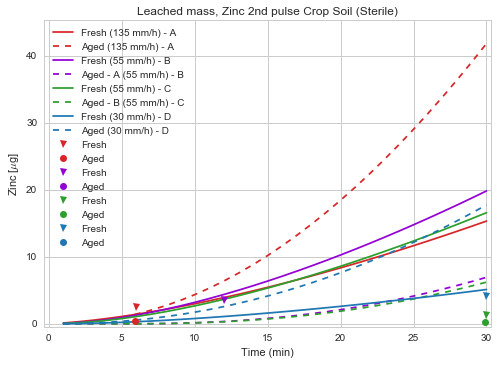

In [35]:
pestiplot_condition(
    mass_percol_sterile2,
    znCr_dict_S_2nd,
    'Zinc',
    soil_type='Crop Soil',
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = True
)

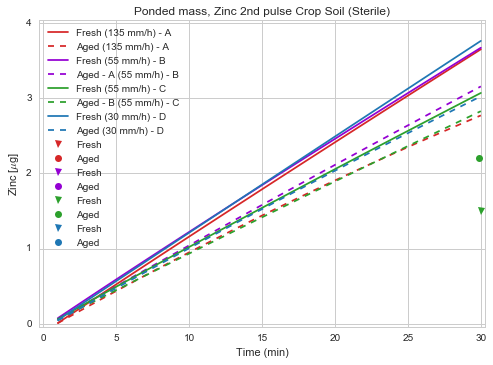

In [36]:
pestiplot_condition(
    mass_pond_sterile2,
    znCr_dict_S_2nd,
    'Zinc',
    soil_type='Crop Soil',
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = True
)

### Living (2nd Pulse, Crop Soil)

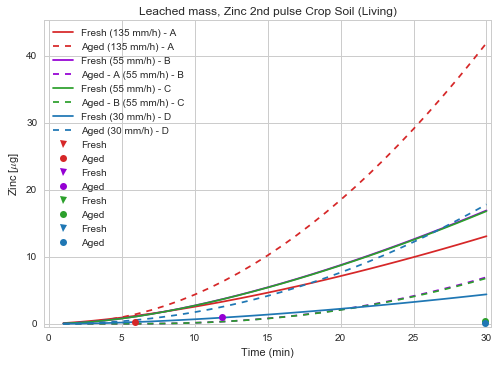

In [37]:
pestiplot_condition(
    mass_percol_living2,
    znCr_dict_L_2nd,
    'Zinc',
    soil_type='Crop Soil',
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = False
)

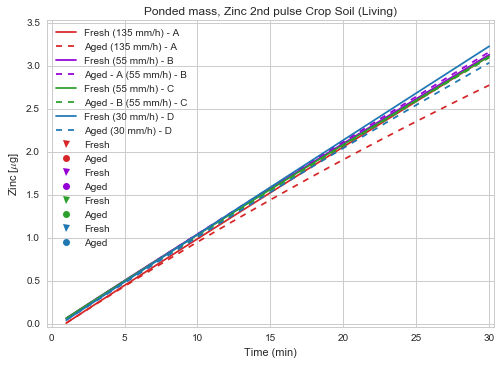

In [38]:
pestiplot_condition(
    mass_pond_living2,
    znCr_dict_L_2nd,
    'Zinc',
    soil_type='Crop Soil',
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = False
)

END NOTEBOOK